In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import network_generation as homomul
import spread_simulation
from tqdm.notebook import tqdm

# Experiment with different Threshold levels

The current model is quite sensitive to the threshold of the complex contaigion.
For example with the original model settings (m = 5 and 3200 Nodes), a complex threshold of 0.18 was unable to spread further than a few nodes. 
So a minor deviation in this value results in a completely different behaviour. 


## Spread based on Threshold and Consolidation

To analyize the influence, the following code explores how the threshold and consolidation param influence the spread in the network. 
We start of with a rather high homophily of 0.8. In this setting, the original experiments were just able to spread in some settings and only seldom. So this setting allows us to view the edge-cases and explore if a different threshold or consolidation would facility a spread with the same homophily. 


In [3]:
model_settings = {
    'N': 3200, 
    'm': 5, 
    'consolidation_param': 0.1,
    'marginal_distribution': [[0.5,0.5],[0.5,0.5]], 
    'homophily': 0.8, 
    'complex_threshold': 0.16,
    'initial_seed_filter': lambda x: x.nodes
}

experiment_settings = {
    'n_networks': 2,
    'n_initial_seeds': 5
}

  0%|          | 0/60 [00:00<?, ?it/s]

consolidation_param: 0.00 / complex_threshold: 0.10 => avg = 1.00; global = 1.00
consolidation_param: 0.00 / complex_threshold: 0.11 => avg = 1.00; global = 1.00
consolidation_param: 0.00 / complex_threshold: 0.12 => avg = 1.00; global = 1.00
consolidation_param: 0.00 / complex_threshold: 0.13 => avg = 1.00; global = 1.00
consolidation_param: 0.00 / complex_threshold: 0.14 => avg = 0.21; global = 0.20
consolidation_param: 0.00 / complex_threshold: 0.16 => avg = 0.30; global = 0.30
consolidation_param: 0.00 / complex_threshold: 0.17 => avg = 0.00; global = 0.00
consolidation_param: 0.00 / complex_threshold: 0.18 => avg = 0.00; global = 0.00
consolidation_param: 0.00 / complex_threshold: 0.19 => avg = 0.01; global = 0.00
consolidation_param: 0.00 / complex_threshold: 0.20 => avg = 0.00; global = 0.00
consolidation_param: 0.10 / complex_threshold: 0.10 => avg = 1.00; global = 1.00
consolidation_param: 0.10 / complex_threshold: 0.11 => avg = 1.00; global = 1.00
consolidation_param: 0.10 / 

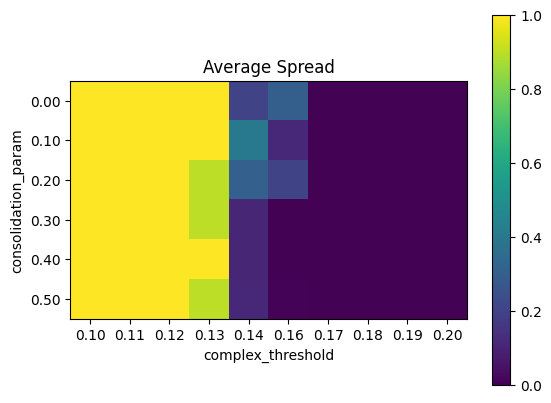

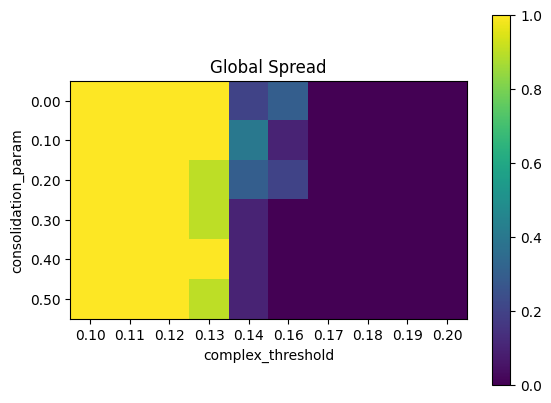

In [4]:
threshold_settings = np.linspace(0.1,0.2,10)
consolidation_settings = np.linspace(0,0.5, 6)

results_average, results_global_spread = spread_simulation.setting_simulate('consolidation_param', consolidation_settings, 
                                                          'complex_threshold', threshold_settings, 
                                                          model_settings, experiment_settings)


## Spread based on Threshold and Homophily

Instead of varying the consolidation, the following experiment explores the influence of homophily. We use a rather low value of consolidation (0.1). This setting had some minor spread with the original settings but was unable to infect the whole network consistently. So we can explore if different thresholds and homophily combinations would allow for a global cascade. 


  0%|          | 0/110 [00:00<?, ?it/s]

complex_threshold: 0.10 / homophily: 0.00 => avg = 0.50; global = 0.00
complex_threshold: 0.10 / homophily: 0.10 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.20 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.30 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.40 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.50 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.60 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.70 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.80 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 0.90 => avg = 1.00; global = 1.00
complex_threshold: 0.10 / homophily: 1.00 => avg = 0.25; global = 0.00
complex_threshold: 0.11 / homophily: 0.00 => avg = 0.51; global = 0.00
complex_threshold: 0.11 / homophily: 0.10 => avg = 1.00; global = 1.00
complex_threshold: 0.11 / homophily: 0.20 => avg = 1.00; global = 1.00
comple

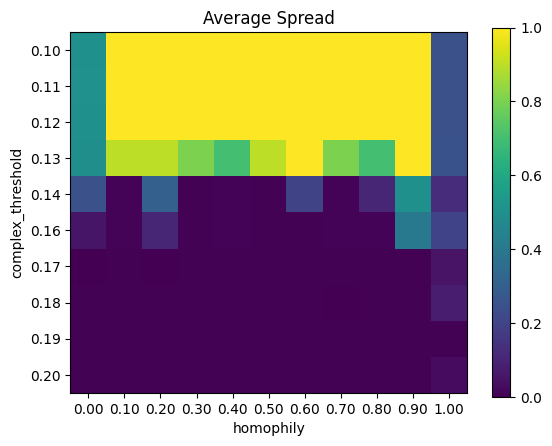

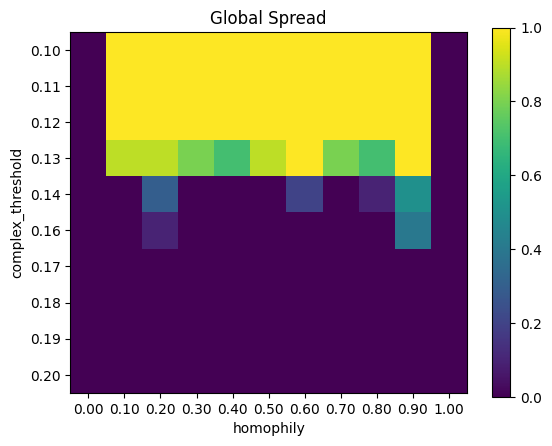

In [9]:
threshold_settings = np.linspace(0.1,0.2,10)
homophily_settings = np.linspace(0,1,11)
results_average, results_global_spread = spread_simulation.setting_simulate('complex_threshold', threshold_settings, 
                                                          'homophily', homophily_settings, 
                                                          model_settings, experiment_settings)

## Different Complex Threshold

Here we display how homophily and consolidation perform differently on different complex threshold. The first setting has a threshold of 0.15, whereas the second setting explores a scenario with an 0.14 threshold. 

We can see that the Influnce is quite pronounced. The first one is similar to the results with a threshold of 0.16, but with 0.14, basically all of the settings result in a global cascade. 

  0%|          | 0/66 [00:00<?, ?it/s]

consolidation_param: 0.00 / homophily: 0.00 => avg = 0.01; global = 0.00
consolidation_param: 0.00 / homophily: 0.10 => avg = 0.01; global = 0.00
consolidation_param: 0.00 / homophily: 0.20 => avg = 0.01; global = 0.00
consolidation_param: 0.00 / homophily: 0.30 => avg = 0.11; global = 0.10
consolidation_param: 0.00 / homophily: 0.40 => avg = 0.01; global = 0.00
consolidation_param: 0.00 / homophily: 0.50 => avg = 0.11; global = 0.10
consolidation_param: 0.00 / homophily: 0.60 => avg = 0.01; global = 0.00
consolidation_param: 0.00 / homophily: 0.70 => avg = 0.01; global = 0.00
consolidation_param: 0.00 / homophily: 0.80 => avg = 0.31; global = 0.30
consolidation_param: 0.00 / homophily: 0.90 => avg = 0.30; global = 0.30
consolidation_param: 0.00 / homophily: 1.00 => avg = 0.16; global = 0.00
consolidation_param: 0.10 / homophily: 0.00 => avg = 0.01; global = 0.00
consolidation_param: 0.10 / homophily: 0.10 => avg = 0.50; global = 0.50
consolidation_param: 0.10 / homophily: 0.20 => avg 

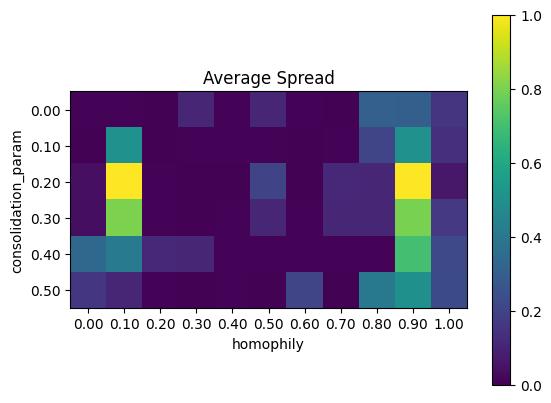

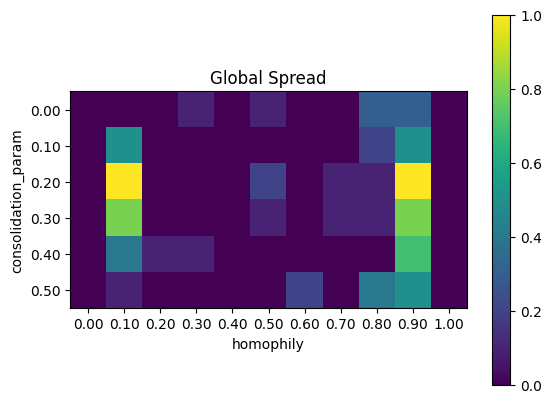

In [7]:
model_settings = {
    'N': 3200, 
    'm': 5, 
    'consolidation_param': 0.1,
    'marginal_distribution': [[0.5,0.5],[0.5,0.5]], 
    'homophily': 0.8, 
    'complex_threshold': 0.15,
    'initial_seed_filter': lambda x: x.nodes
}


homophily_settings = np.linspace(0,1,11)
consolidation_settings = np.linspace(0,0.5, 6)

results_average, results_global_spread = spread_simulation.setting_simulate('consolidation_param', consolidation_settings, 
                                                          'homophily', homophily_settings, 
                                                          model_settings, experiment_settings)

  0%|          | 0/66 [00:00<?, ?it/s]

consolidation_param: 0.00 / homophily: 0.00 => avg = 0.90; global = 0.90
consolidation_param: 0.00 / homophily: 0.10 => avg = 1.00; global = 1.00
consolidation_param: 0.00 / homophily: 0.20 => avg = 0.80; global = 0.80
consolidation_param: 0.00 / homophily: 0.30 => avg = 0.90; global = 0.90
consolidation_param: 0.00 / homophily: 0.40 => avg = 0.90; global = 0.90
consolidation_param: 0.00 / homophily: 0.50 => avg = 1.00; global = 1.00
consolidation_param: 0.00 / homophily: 0.60 => avg = 0.80; global = 0.80
consolidation_param: 0.00 / homophily: 0.70 => avg = 0.90; global = 0.90
consolidation_param: 0.00 / homophily: 0.80 => avg = 1.00; global = 1.00
consolidation_param: 0.00 / homophily: 0.90 => avg = 0.90; global = 0.90
consolidation_param: 0.00 / homophily: 1.00 => avg = 0.50; global = 0.00
consolidation_param: 0.10 / homophily: 0.00 => avg = 0.36; global = 0.00
consolidation_param: 0.10 / homophily: 0.10 => avg = 0.90; global = 0.90
consolidation_param: 0.10 / homophily: 0.20 => avg 

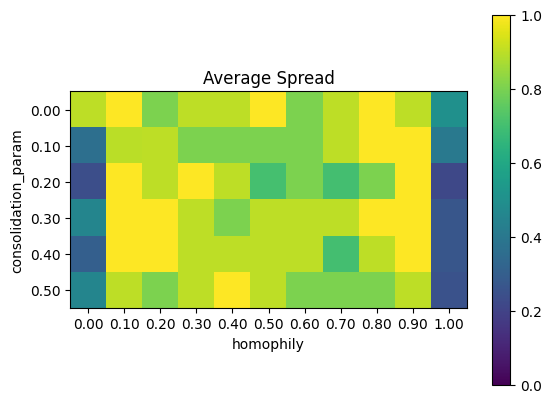

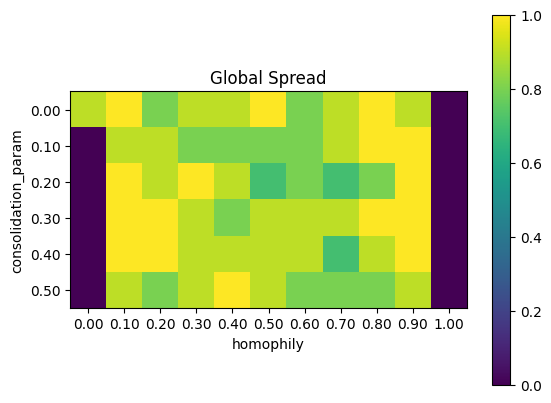

In [8]:
model_settings = {
    'N': 3200, 
    'm': 5, 
    'consolidation_param': 0.1,
    'marginal_distribution': [[0.5,0.5],[0.5,0.5]], 
    'homophily': 0.8, 
    'complex_threshold': 0.14,
    'initial_seed_filter': lambda x: x.nodes
}


homophily_settings = np.linspace(0,1,11)
consolidation_settings = np.linspace(0,0.5, 6)

results_average, results_global_spread = spread_simulation.setting_simulate('consolidation_param', consolidation_settings, 
                                                          'homophily', homophily_settings, 
                                                          model_settings, experiment_settings)